<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Squeeze_and_Excitation_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Squeeze-and-Excitation Networks**

논문 링크: https://arxiv.org/abs/1709.01507

SENet(Squeeze-and-Excitation Networks)은 2018년도에 CVPR에서 발표된 논문이다. 또한 2017년에 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승을 차지한 신경망(CNN)구조이다. top-5 error가 2.251%밖에 되지 않는다.

해당 논문은 SE block이라는 것을 제안했는데, 이는 기존의 **선행 연구들이 relationship의 spatial component를 조사하고, feature 계층 전반에 걸친 spatial encoding의 품질을 향상시켜 CNN의 representational power를 강화**하게 할려고 하였는데, 쉽게 풀어 설명을 하면 CNN기반 네트워크들은 convolution filter 하나하나가 이미지 또는 feature-map의 local 즉,local receptive field에 있는 정보들의 조합을 활성함수에 통과시켜 비선형적인 관계를 추론하는 방식이었다. 하지만 기존의 방식과 달리 SE block은 **channel relationship에 중점을 두어, channel 간의 interdependency를 명시적으로 모델링함으로써 channel-wise feature reponse를 adaptive하게 recalibration**하게 해준다. 한마디로 channel에 중점을 둔것이다. SE block의 장점은 **1. 어떤 모델에도 적용을 할 수 있으며**, **2. parameter의 증가량에 비해 모델 성능 향상도가 매우 크다**.

## **SENet 구조**

### **SE block**

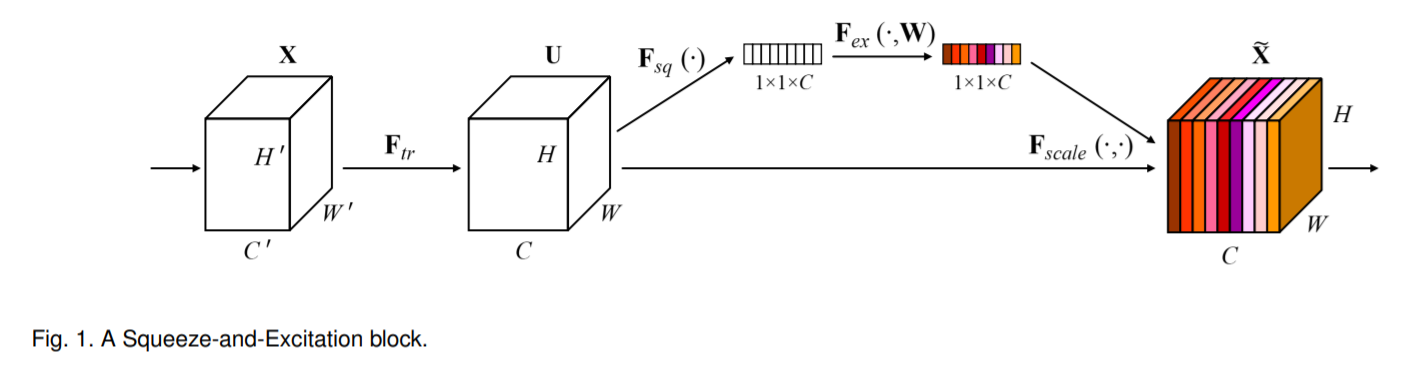

위의 그림이 바로 SE block이다.

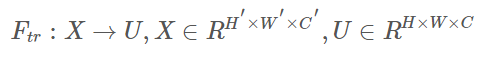

위 수식은 F(tr)는 X에서 U로 바뀌는 convolution 연산이고, X는 H' x W' x C' 크기의 feature-map이며, U는 H x W x C 크기의 feature-map

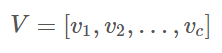

V는 필터 집합이고, V의 각 필터의 파라미터인 v(c)는 c번째 필터의 피라미터이다.

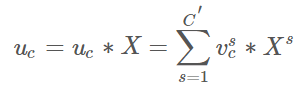

위의 수식은 간단하게 그냥 convolution 연산이라고 생각하면 된다.

그림을 해석해보자면 먼저, **H' x W' x C' 크기의 feature-map X**가 F(tr)을 통하여 **H x W x C 크기의 feature-map U**가 된다. 그리고 **스퀴즈(squeeze)**를 실행한다. C개 채널의 2차원 (H x W)의 feature-map들을 1 x 1 크기의 feature-map으로 변환해주는 것이다. 간단히 **global average pooling (GAP)**을 통해 각 2차원의 feature-map을 평균내어 하나의 값을 얻는다.

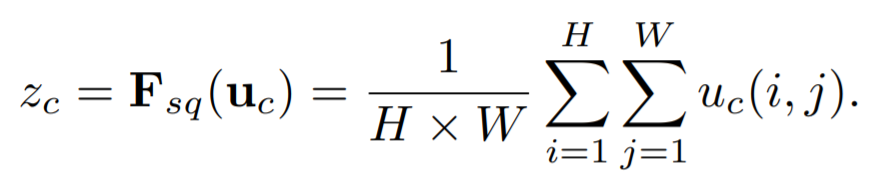

이로인해 각 채널을 하나의 숫자로 묘사할 수 있게 된다. 위의 식을 설명하자면, **총 C개 채널의 feature-map이 있으므로 1 x 1 x c 크기의 feature-map으로 스퀴즈(squeeze)**한거라고 보면 된다. z(c)는 채널 C의 원소 중 하나가 된다. 논문의 저자는 **간단한 방식으로 정보를 압축하기 위해 GAP를 사용**했지만, 다른 방법도 사용할 수 있다고 하였다.

즉, feature-map을 global하게 표현한 것이다. 간단하게 convolution이 local 정보를 다룬다면, squeeze는 global 정보를 다룬다고 생각하면 된다.

위의 식을 통해 **중요한 정보들을 압축(squeeze)**했다. 이후에는 재조정(Recalibration)을 위해 activation function(ReLU, sigmoid)과 두 개의 Fully-Connected 층을 추가하여  **채널 간 의존성(channel-wise dependencies)**를 알아낸다. 이 과정을 **Excitation operation**이라 한다.

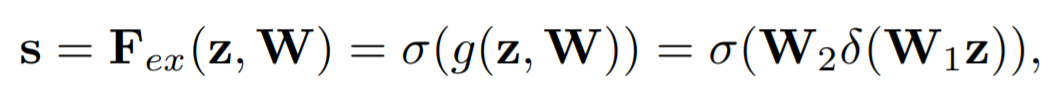

위의 식에서 σ는 sigmoid이고, δ는 ReLU이다. 식을 살펴보면 squeeze를 통해 얻은 z(c)를 input으로 삼아 W1 가중치로 Fully-Connected해준 뒤, 해당 output을 ReLU로 활성화를 해주고 W2 가중치로 Fully-Connected를 해준다. 또 다시 해당 output을 sigmoid로 활성화를 시켜 0과 1사이의 값을 갖게 한다. 해당 값으로 상대적 중요를 0~1 사이의 값으로 판단할 수 있게 된다.

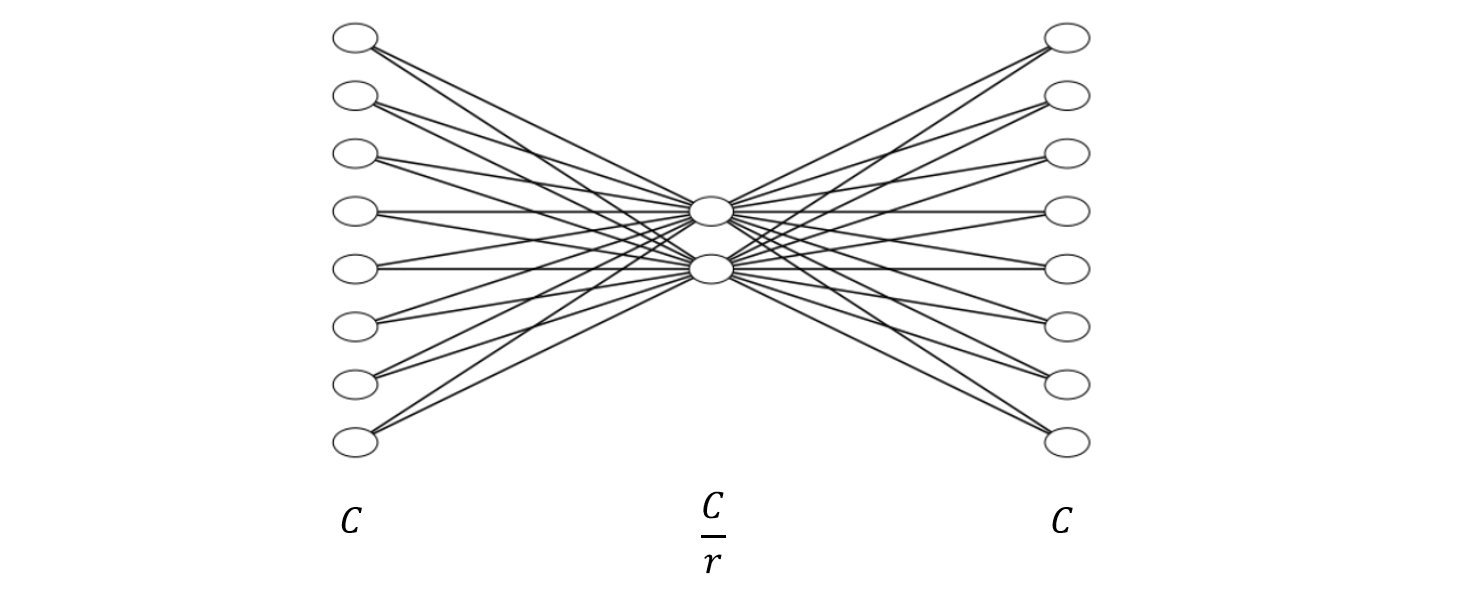

여기서 중요한 점은 Fully-Connected 층들이 위 그림처럼 병목(bottle-neck)구조란 점이다. hidden layer의 뉴런 갯수를 입력층보다 작게 한다. 그리고 출력 층의 뉴런 갯수는 입력층과 동일하게 한다. 이러한 병목 구조덕분에 hyper-parameter의 갯수를 덜 늘릴수 있고, 일반화에도 도움이 된다.

hidden layer의 뉴런 갯수는 **reduction**, 즉 r값에 의해 결정이 된다. r이 클수록 hidden layer의 뉴런 갯수가 적어지고, 복잡도도 더 낮아진다. 따라서 각 층의 뉴런의 갯수는 채널의 갯수, 위의 그림을 보면 알수 있듯이 **C에서 시작해서 C/r로 감소했다가 다시 C로 증가**한다.

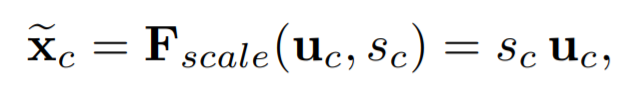

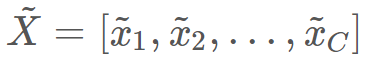

이렇게 **얻은 C개의 S(c)**를 위의 수식처럼 **GAP 이전의 C개의 U(c)**에 각각 곱해 U를 재보정한다. 그것을 ~X라 한다.

정리하면, feature-map은 X에서 Convolution을 통해 U로, U에서 SE block을 통해 ~X로 최종 변환이 완료가 된다.

**SE block의 목적은 컨볼루션을 통해 생선된 특성을 채널당 중요도를 고려해서 재보정(recalibration)하는 것**이다. 이러한 SE block을 컨볼루션 연산 뒤에 붙여 성능을 향상시키는 것이 바로 SENet이다.

## **Instantiations**

위에서 적용이 매우 쉽다고 했으니 이제 실제 적용 예시를 알아보겠다.

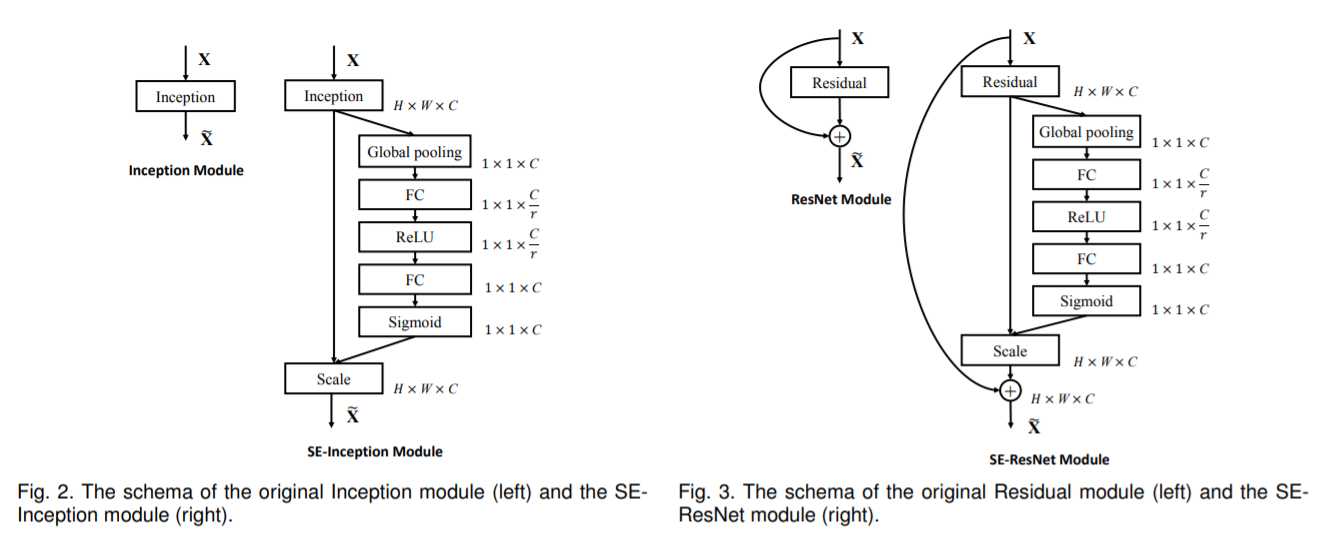

논문의 저자들은 VGGNet, GooLeNet, ResNet에 SE block을 적용시켰다. VGGNet의 경우는 그냥 바로 적용을 시켰고, Inception module이나 skip connection이 있는 네트워크들은 위의 이미지와 같이 바로 뒤에 붙이는 식으로 적용했다.

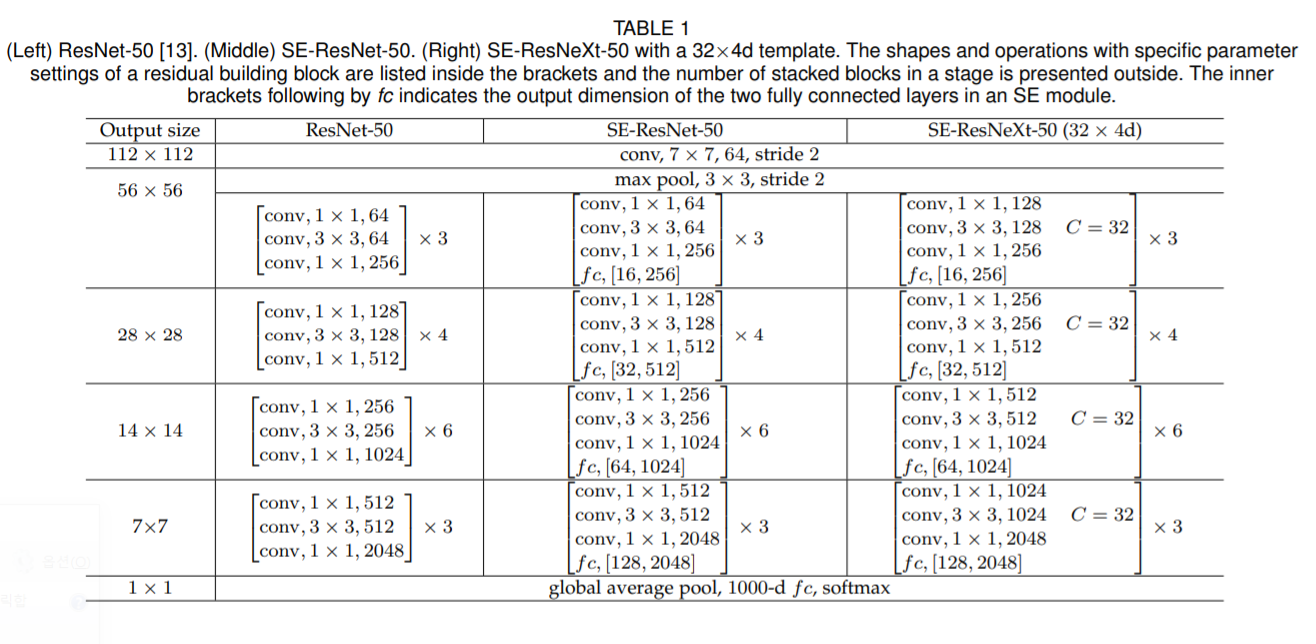

위 그림은 SENet의 구체적인 예시로, SE-ResNet-50과 SE-ResNeXt-50 구조에 대해 자세히 나와있다.

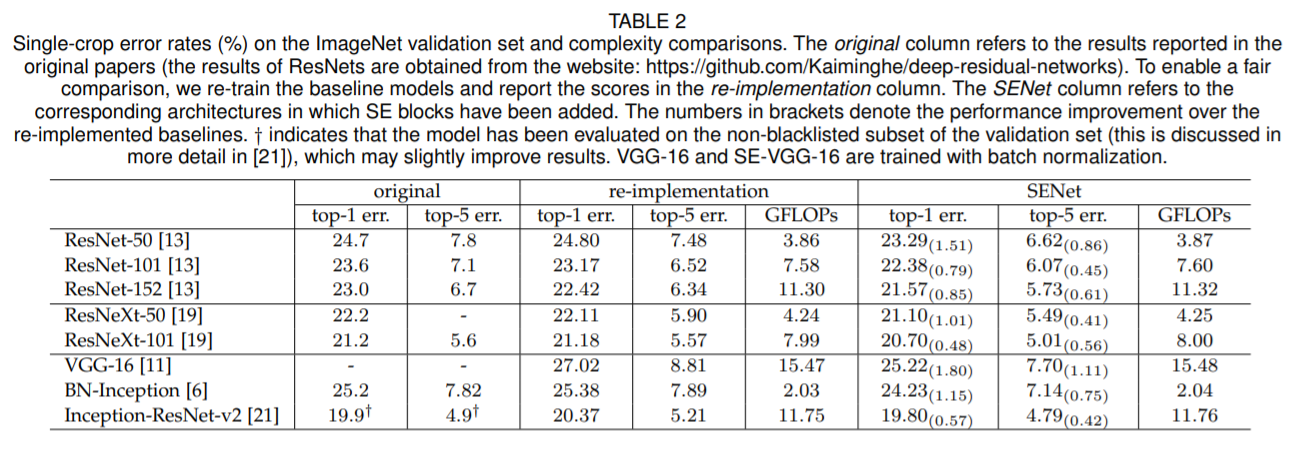

위 테이블을 보면 알 수 있듯이 약간의 추가적인 계산 부담을 감수한 SE-ResNet-50의 정확도는 ResNet-50의 정확도를 능가하며, 실제로 ~7.58 GELOPs를 요구하는 ResNet-101의 정확도에 근접한다.

실질적으로, ResNet-50의 single pass forward 및 backward에는 190ms가 소요됐으며, SE-ResNet-50의 경우에는 209ms가 소요됐다.

## **MODEL AND COMPUTATIONAL COMPLEXITY**

네트워크에 SE block을 적용한다면, 당연히 모델 복잡도와 퍼포먼스의 trade-off가 있기 마련이다. 모델이 무거워질수록 계산 복잡도는 올라가지만, 그만큼의 성능 향상을 기대할 수 있다.

위에서 했던 Table 2를 참고하면 알 수 있듯이, 복잡도는 약 0.26%밖에 증가하지 않았음에도 error는 상당히 줄어든 것을 알 수 있다.

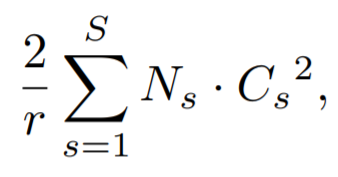

SE block에서 계산 복잡도에 영향을 미치는 변수는 바로 **reduction radio** 즉, r이다. 먼저 SE block을 적용했을 때 추가되는 파라미터의 수식은 위와 같다.

위 수식에서 S는 stage의 수, C(s)는 output channel의 차원, N(s)는 stage가 S일때 반복되는 block의 갯수다.

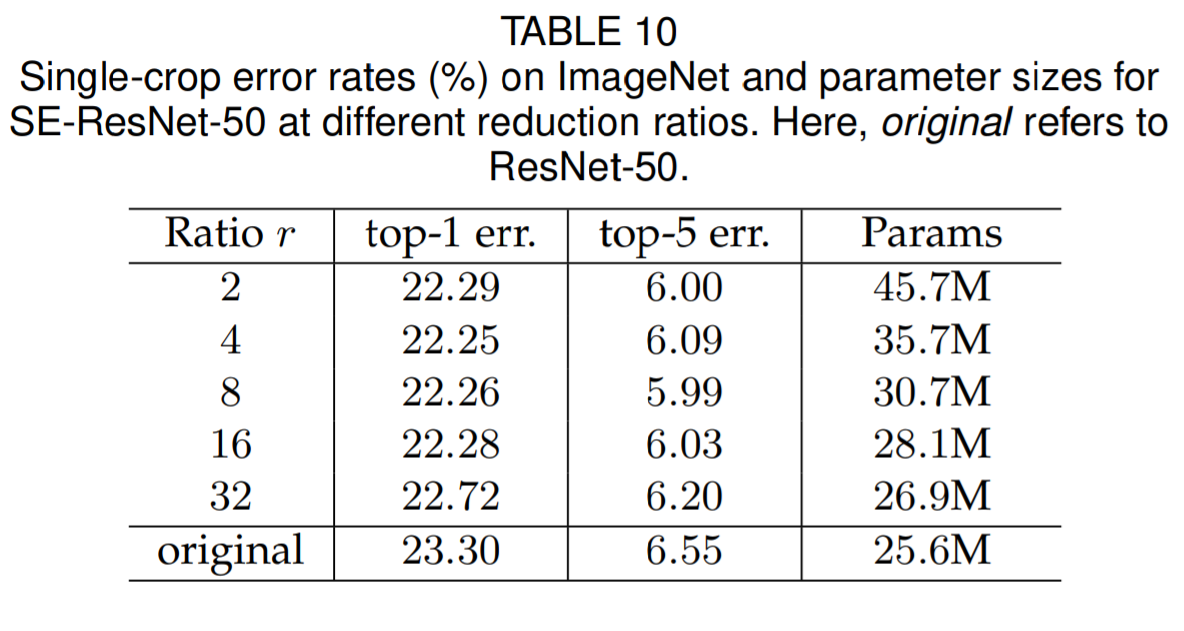

논문에서는 SE-ResNet-50 네트워크를 통해 r값을 변경하면서 실험을 진행하였다.

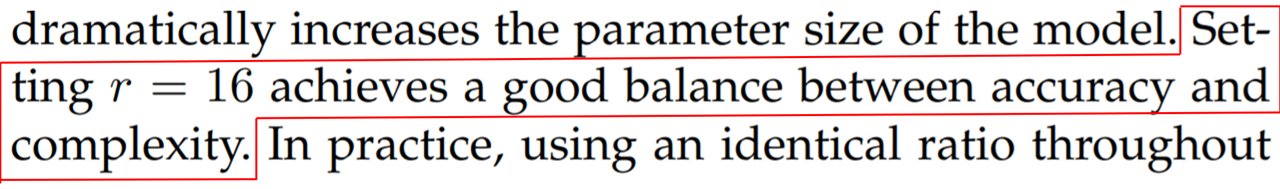

실험의 결과는 위의 글처럼 r값을 16으로 설정했을 때 에러가 크게 줄어들거나 늘지 않는 최적의 성능을 보여줬다. 또한 parameter의 경우 2.5million개 정도가 추가로 들어가는데, 이는 약 10%정도만 증가한 수치이다. 그리고 마지막 layer의 SE block는 제거해도 성능에 큰 차이가 없었다.